# **Logistic regression on heart attack dataset**

**By Philip Blumin and Paul Cucchiara**

# **Data Preproccessing**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from sklearn.metrics import accuracy_score

In [29]:
ds = pd.read_csv('SAheart.txt')
ds = ds.drop(columns=['row.names'], axis=1)
ds.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


**Above are the first few lines of the dataset. The data set has a column with none numerical features (famhist). In the code below this column is one hot encoded**

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
ds = np.array(ct.fit_transform(ds))
ds = np.delete(ds, 0, axis=1)

In [31]:
#print(ds)
columns = ['famhist', 'sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd']
df = pd.DataFrame(ds, columns= columns)

In [32]:
df = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']]
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,1.0,49.0,25.30,97.20,52.0,1.0
1,144.0,0.01,4.41,28.61,0.0,55.0,28.87,2.06,63.0,1.0
2,118.0,0.08,3.48,32.28,1.0,52.0,29.14,3.81,46.0,0.0
3,170.0,7.50,6.41,38.03,1.0,51.0,31.99,24.26,58.0,1.0
4,134.0,13.60,3.50,27.78,1.0,60.0,25.99,57.34,49.0,1.0


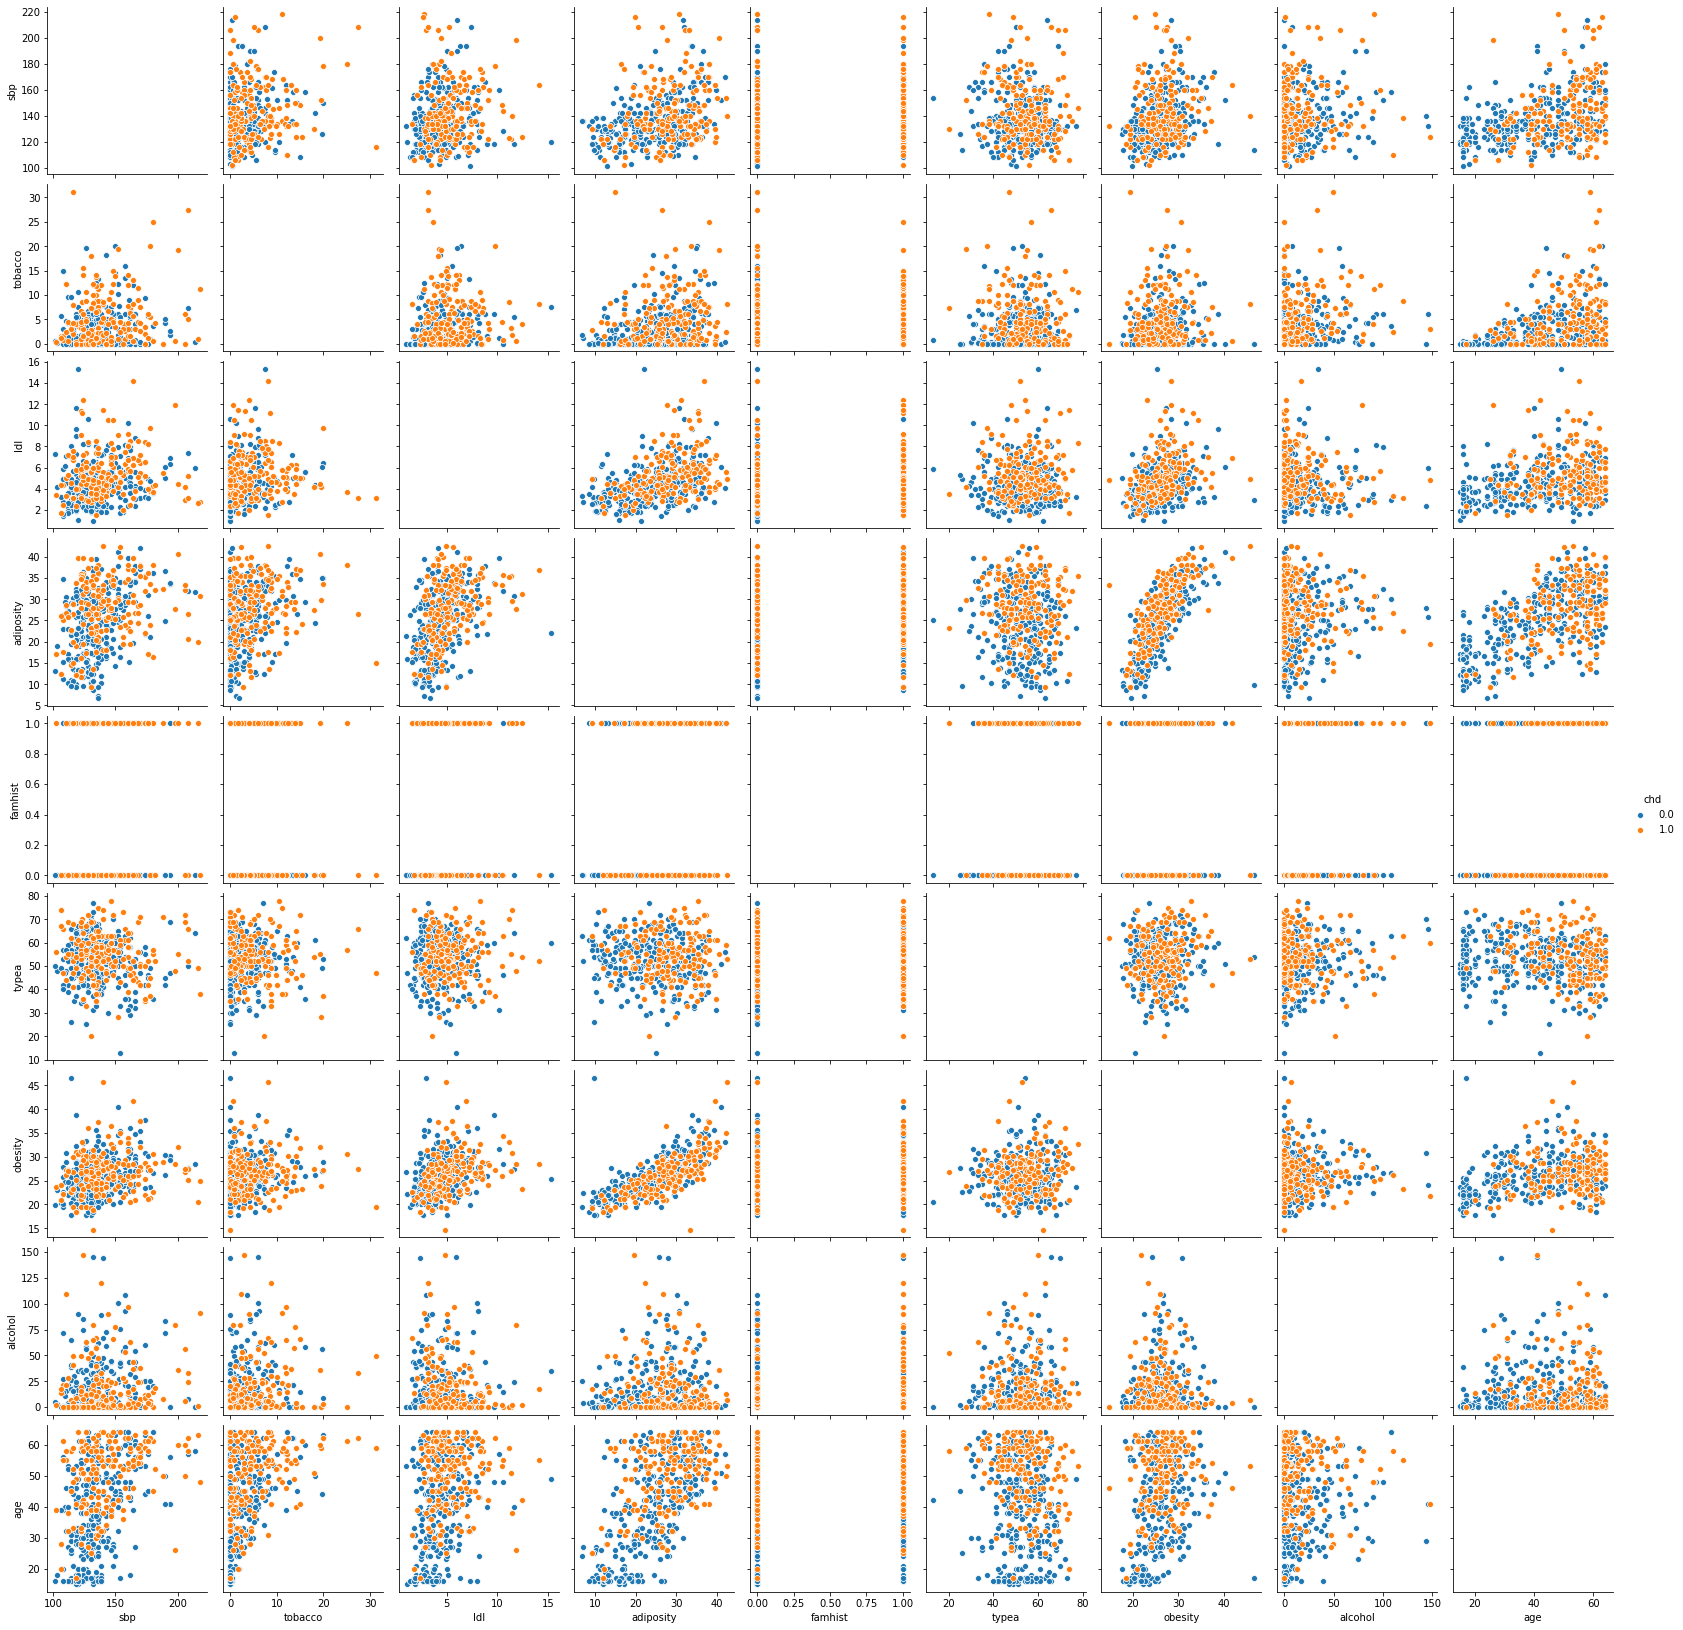

In [33]:
sns.pairplot(df, hue="chd", diag_kind= ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age'])

**Above is a pairplot of all the data. This was created using the seaborn library**

**The features, X, are seperated from what we want to predict (chd). Notice how the predictions column is binary.**

In [34]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**The Dataset is split into 80% train, 10% validation, and 10% test**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

**The train, test, and validation data is all scaled and a column of 1s is appended to each in order to leave a spot for Theta_0**

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.fit_transform(X_val)

In [37]:
ones = np.ones((1,len(X_train)))
X_train = np.insert(X_train, 0, ones, axis=1)

ones = np.ones((1,len(X_val)))
X_val = np.insert(X_val, 0, ones, axis=1)

ones = np.ones((1,len(X_test)))
X_test = np.insert(X_test, 0, ones, axis=1)

In [38]:
baseline = np.sum([0 == y_test[i] for i in range(0, len(y_test))])
ascore_baseline = baseline/len(y_test)
print("Accuracy Score of baseline: ", ascore_baseline)
scores = []
scores.append(ascore_baseline);

Accuracy Score of baseline:  0.6956521739130435


**Above is the baseline accuracy score**

# **Unregularized Logistic Regression**


**Below is the training of our Unregularized Logistic Regression Model**

**H is the variable we used for the sigmoid function and it is calculated using the fomrula: h = 1/(1+ exp(-(theta * X_i)))**

**Then this value from the sigmoid function used to calaculate each individual theta using by doing: theta_j = theta_j + (a * (y_i - h) * X_i_j)**

**Here all the thetas are originally set to 0 and the step size, a, is set to 0.01**

In [39]:
theta = np.zeros(10)
a = 0.01
for j in range(0, len(X_train[0])):
  for i in range(0, len(X_train)):
      for x in range(0, 5):
        h = 1/(1 + np.exp(-np.matmul(np.transpose(theta), X_train[i])))
        theta[j] = theta[j] + (a * (y_train[i] - h) * X_train[i][j]) 

print("Thetas for Unregularized Logistic Regression: ", theta)

Thetas for Unregularized Logistic Regression:  [-0.60494769  0.47123356  0.51611054  0.31102443 -0.16004647  0.28505182
  0.2262215  -0.33441209 -0.11800036  0.5139083 ]


**Above are the thetas calculated by the model. Below, these thetas are  used to predict the test data, by using the sigmoid function. If the sigmoid function produced a value greater than 0.5, the prediction was set to 1 and if it produced a value less than 0.5, the prediction was set to 0.**

In [40]:
pred = []
for i in range(0, len(X_test)):
  h = 1/(1 + np.exp(-np.matmul(np.transpose(theta), X_test[i])))
  if h > .5:
    h = 1
  else:
    
    h = 0
  pred.append(h)

pred = np.array(pred)
#print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

In [41]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(y_test, pred)
print("Accuracy Score: ", ascore)
scores.append(ascore);

Accuracy Score:  0.7608695652173914


**Above is the accuracy score on the test data. This accuracy score changes with every run as random points are used in the training calculation. In general, the score is usually around 76%. The accuracy score is slightly better than the baseline score.**

# **L2 regularized Logistic Regression**

In [42]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_val = np.delete(X_val, 0, axis=1)

**The 1s column created in the previous section and the intersept term is added manually in each of the models to come**

In [43]:
theta_0 = theta[0]

**Below is the calulation to get the best theta for the L2 regularized logistic regression model**

**The formula and method is similar to the one used in the unregularized calulation, except when getting each theta a penalty term is subracted**

**Penalty: 2 * lambda * theta**

**100 different lambdas where used in the calulation ranging from 0.1 to 10. Since the function loops alot of times, in the calulation for each of the thetas, a random row from the training datasets were used. Using random rows avoids overfitting the data. Each theta was then tested with the validation data and the theta that produced the lowest accuracy score was aquired.**

In [44]:
best_ac = 0
best_lambda = 0
#beta_theta = np.zeros(9)
theta1 = np.zeros(9)
for l in np.linspace(0.1, 10, 100) :
  for x in range(0, 50):

    #--------Getting Each Theta--------------#

    i = random.randint(len(X_train))
    h1 = 1/(1 + np.exp(-np.matmul(np.transpose(theta1), X_train[i])))
    theta1 = theta1 + (a * (((y_train[i] - h1) * X_train[i])  - 2*l*theta1))

    #--------Predicting validation data using each Theta--------------#

    pred2 = [];
    for i in range(0, len(X_val)):
      h1 = 1/(1 + np.exp(-(theta_0  + np.matmul(np.transpose(theta1), X_val[i]))))
      if h1 > .5:
        h1 = 1
      else:
        h1 = 0
      pred2.append(h1)
    pred2 = np.array(pred2)
    ascore2 = accuracy_score(y_val, pred2)

    #--------Getting best accuracy score--------------#

    if ascore2 > best_ac:
      best_ac = ascore2
      best_lambda = l
      best_theta = theta1

#print(best_ac)
print("Best Lambda: ", best_lambda)
print("Best Thetas for L2 regularized: ", best_theta)

Best Lambda:  0.6
Best Thetas for L2 regularized:  [ 0.10146355  0.10478341  0.10789378  0.06818513  0.06775913  0.02030873
 -0.01322966 -0.01687693  0.14547348]


**Above the best lambda and thetas from the L2 regularized calculation are displayed. These thetas are used to predict the test data the same was they were used in the unregularized regression model**

In [45]:
pred3 = [];
for i in range(0, len(X_test)):
  h2 = 1/(1 + np.exp(-(theta_0  + -.7 + np.matmul(np.transpose(best_theta), X_test[i]))))
  if h2 > .5:
    h2 = 1
  else:
    h2 = 0 
  pred3.append(h2)
pred3 = np.array(pred3)
ascore3 = accuracy_score(y_test, pred3)
scores.append(ascore3);
print("Accuracy Score: ", ascore3)

Accuracy Score:  0.6956521739130435


**Above is the accuracy score on the test data. This accuracy score changes with every run as random points are used in the training calculation. In general the accuracy score ranges between 73 and 80%. On average this accuracy score is usually smaller than the accuracy score from the unregularized model. Since this dataset is pretty small it makes sense that adding an L2 penalty might not make the results better. The accuracy score is slightly better than the baseline score.**

# **Stepwise Logistic Regression**

**Below is a function that preforms the calulation using the stepwise method for logistic regression. This calculation is similar to the one used the L2 regularized, but instead of using thetas for each feature at the same time, individual thetas are calculated and the best thetas for each feature are used.**

In [46]:
def stepwise(n):
  best_ac_1 = 0
  best_lambda_1 = 0
  zeros = np.zeros(9)
  zeros[n] = 1
  theta_1 = np.zeros(9)
  for l in np.linspace(0.1, 10, 100) :
    for x in range(0, 50):

      #--------Getting Each Theta--------------#

      i = random.randint(len(X_train))
      h_1 = 1/(1 + np.exp(-np.matmul(np.transpose(theta_1), X_train[i])))
      theta_1 = theta_1 + (a * ((y_train[i] - h_1) * X_train[i]))
      theta_1 = theta_1 * zeros
      #theta_1[1:] = theta_1[1:] * 0;
      #print(theta_1)

    #--------Predicting validation data using each Theta--------------#

      pred4 = [];
      for i in range(0, len(X_val)):
        h_1 = 1/(1 + np.exp(-(theta_0 + np.matmul(np.transpose(theta_1), X_val[i]))))
        if h_1 > .5:
          h_1 = 1
        else:
          h_1 = 0
        pred4.append(h_1)
      pred4 = np.array(pred4)
      ascore4 = accuracy_score(y_val, pred4)

      #--------Getting best accuracy score--------------#
      
      if ascore4 > best_ac_1:
        best_ac_1 = ascore4
        best_lambda_1 = l
        best_theta_1 = theta_1[n]

  return best_theta_1

**The function above is preformed 9 times, once for each of the features. The best thetas from each are appended to theta_stepwise array, which contains the best thetas.**

In [47]:
thetas_stepwise = []
for i in range(0, 9):
    thetas_stepwise.append(stepwise(i))

print("Stepwise Thetas: ", thetas_stepwise)

Stepwise Thetas:  [-0.005838360424085222, 0.40081167902018017, 0.4767038220632273, 0.39729468661386547, -0.0043267053455163205, -0.00031818319972645774, 0.2914137052511878, 0.003466520220997348, 0.437997194182864]


**Above the stepwise thetas for this run are shown. The 4 highest thetas for every run are selected to use for the training sets. The other thetas are dropped as well as their corresponding features**


In [48]:
#Import features: Theta[1,2,3,5,6,8]
thetas_stepwise_updated = [thetas_stepwise[1], thetas_stepwise[2], thetas_stepwise[3],thetas_stepwise[8]]
X_test_updated = np.delete(X_test, [0,4,6, 5,7], axis=1)

**The top 4 features selected by the stepwise method are: *Tabacco, ldl, adiposity, and age.* These features make sense as the ones that are selected as one would expect tabacco, age, and adiposity to lead to a heart attack**

In [49]:
pred5 = [];
for i in range(0, len(X_test_updated)):
  h3 = 1/(1 + np.exp(-(theta_0 + np.matmul(np.transpose(thetas_stepwise_updated), X_test_updated[i]))))
  if h3 > .5:
    h3 = 1
  else:
    h3 = 0 
  pred5.append(h3)
pred5 = np.array(pred5)
ascore5 = accuracy_score(y_test, pred5)
scores.append(ascore5);
print("Accuracy Score: ", ascore5)

Accuracy Score:  0.7391304347826086


**Above is the accuracy score on the test data. Just like the L2 regularized model this accuracy score changes with every run as random points are used in the training calculation. In general, the accuracy score ranges between 71 and 78%. On average this accuracy score is slightly worse than the accuracy score of the L2 regularized and unregularized models. Again since this is a pretty small dataset it is not expected that stepwise would be much better than L2 regularized. The accuracy score is slightly better than the baseline score.**

# **Stretch Goal #1 (L1 Penalty)**

**Below is the calulation to get the best thetas for the L1 regularized logistic regression model. This is the niave approach**

**The formula and method is similar to the one used in the L2 regularized calulation, except when getting each theta a different penalty term is subracted**

**Penalty: l/len((x_train) * np.sum(sign(theta2))**

In [50]:
best_ac_2 = 0
best_lambda_2 = 0
#beta_theta = np.zeros(9)
theta2 = np.zeros(9)
lambda_list = []
theta_list = []
for l in np.linspace(0, 1, 50) :
  lambda_list.append(l)
  for x in range(0, 100):
    
    #--------Getting Each Theta--------------#

    i = random.randint(len(X_train))
    h4 = 1/(1 + np.exp(-np.matmul(np.transpose(theta2), X_train[i])))
    theta2 = theta2 + (a * ((y_train[i] - h4) * X_train[i]  - l/len(X_train) * np.sign(np.sum(theta2))))
    
    #--------Predicting validation data using each Theta--------------#

    pred6 = [];
    for i in range(0, len(X_val)):
      h4 = 1/(1 + np.exp(-(theta_0 + np.matmul(np.transpose(theta2), X_val[i]))))
      if h4 > .5:
        h4 = 1
      else:
        h4 = 0
      pred6.append(h4)
    pred6 = np.array(pred6)
    ascore6 = accuracy_score(y_val, pred6)

    #--------Getting best accuracy score--------------#

    if ascore6 > best_ac_2:
      best_ac_2 = ascore6
      best_lambda_2 = l
      best_theta_2 = theta2
  theta_list.append(theta2)

#print(best_ac_2)
print("Best Lambda: ", best_lambda_2)
print("Best Thetas for L1 regularized: ", best_theta_2)

Best Lambda:  0.16326530612244897
Best Thetas for L1 regularized:  [ 0.22787294  0.32855687  0.20401596  0.19524859  0.20736392  0.28911117
 -0.11156166 -0.04225948  0.41463357]


In [51]:
pred7 = [];
for i in range(0, len(X_test)):
  h5 = 1/(1 + -.7 + np.exp(-(theta_0 + np.matmul(np.transpose(best_theta_2), X_test[i]))))
  if h5 > .5:
    h5 = 1
  else:
    h5 = 0 
  pred7.append(h5)
pred7 = np.array(pred7)
ascore7 = accuracy_score(y_test, pred7)
scores.append(ascore7);
print("Accuracy Score: ", ascore7)

Accuracy Score:  0.7608695652173914


**Above is the accuracy score on the test data. Just like the L2 regularized model this accuracy score changes with every run as random points are used in the training calculation. In general, the accuracy score ranges between 74 and 82%. On average this accuracy score is slightly better than the accuracy score of the other methods used. Again since this is a pretty small dataset it is not expected that L1 would be much better than the other methods. The accuracy score is slightly better than the baseline score.**

In [52]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

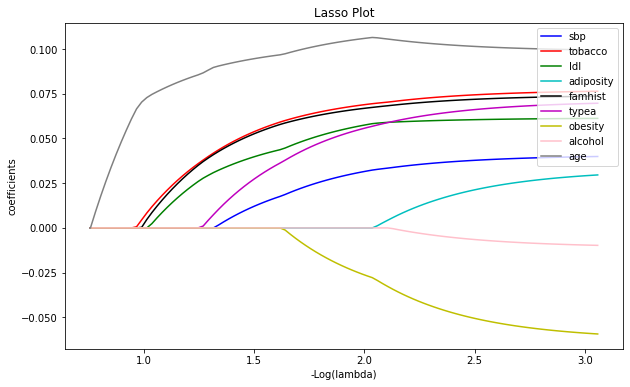

In [53]:
from itertools import cycle
lab = lab = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
plt.figure(figsize=(10,6))
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'y', 'pink', 'grey'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=lab)
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso Plot')
plt.axis('tight')
plt.legend(lab,loc=1,prop={'size': 10})
#plt.axvline(x=(-np.log10(best_lambda)), color = 'red', linestyle='--')
plt.show()

**Above is the lasso plot. The lasso plot selects age, famhist, tabacco, ldl, typea. These are are similar to the features selected by the stepwise method.**

In [54]:
methods = ['Baseline','unregularized', 'L2 Penalty', 'Stepwise', 'L1 Penalty']
data = {'Method' : methods,
      'Accuracy Score' : scores}
df2 = pd.DataFrame(data, columns=['Method', 'Accuracy Score'])
df2

,Method,Accuracy Score
0,Baseline,0.695652
1,unregularized,0.760870
2,L2 Penalty,0.695652
3,Stepwise,0.739130
4,L1 Penalty,0.760870


**From all the different methods used it seems like there was not too much improvement for this dataset. All the methods were slightly better than the baseline. The possible reasons for this are that the dataset is too small and a logistic model might not be the best for predicting this data**

**In a seperate file this exact same procedure is followed on another dataset.**

**Additionally, in a third file the multiclass method is preformed on a new dataset.**